<a href="https://colab.research.google.com/github/Hamid-Mofidi/Diffusion-Models/blob/main/DDPM_Paper/DDPM_coding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The diffusion Model

We first go through the the paper step by step to define the values needed for setting up the forward process. Then we'll clean up the code to "def"ine a forward diffusion funciton.

**Paper: 2020_(DDPM) Denoising Diffusion Probabilistic Models(UC Berkely)**

mean = sqrt(a_hat_t) * x_0

varience = sqrt(1 - a_hat_t) * random noise

In [1]:
import torch

x0    = torch.randn(2,3,32,32)  # batchsize =2, there are 3 channels containing 32x32 matrices (4D)
betas = torch.tensor([0.05, 0.1, 0.15, 0.2, 0.25])
t     = torch.tensor([1,3])  # 1D tensor with two elements corresponding to the batch size of x0 which is 2
# betas  --> amount of noise that are being applied at every timestep of the diffusion process
# alphas --> 1 - betas --> amount of original images's informaiton that is being preserved after a diffusion process
alphas = 1 - betas
alpha_hat = torch.cumprod(alphas, axis = 0)  # torch.cumprod(alphas, axis=0) returns a tensor 
             # of the same shape  as the input tensor, where each element is the cumulative product  
             #  of the corresponding elements in the input tensor along the specified axis.

In [2]:
from re import X
result  = alpha_hat.gather(-1,t).reshape(-1,1,1,1)  # takes a one-dimensional tensor aa and an index tensor t, 
                # gathers elements of aa from the specified indices along the last (rightmost) axis, 
                # reshapes the result to a 4-dimensional tensor, and assigns the result to a new tensor result.
                # Specifically, aa.gather(-1, t) will return a tensor with shape (2,) which contains elements aa[1] and aa[3].
                # result then reshapes the two elements to a 4-dimensional tensor, of shape (2, 1, 1, 1) using 
                # the reshape() function to allow it to be used in subsequent computations.
                # the final value of result is a 4-dimensional tensor with two slices along the first dimension, each of which
                # contains a single scalar element from the original tensor aa, selected based on the indices provided by t

noise  = torch.rand_like(x0) # torch.rand_like(x0) creates a tensor with the same shape as the input tensor x0, 
                             # but with random values generated from a uniform distribution between 0 and 1.
                             # This function is useful when you want to create a tensor with the same shape 
                             # as an existing tensor but with random values. It can be used for tasks such as 
                             # initializing weights in a neural network or creating a random mask for a tensor.
mean   = result.sqrt() * x0
variance = torch.sqrt(1-result) * noise

x_t = mean + variance

Now, let's clean up the code and define the forward diffusion function:

In [12]:
import torch
import urllib
import PIL
from PIL import Image
import torchvision
from torchvision import transforms
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import math


def forward_diffusion(x0, t, betas = torch.linspace(0.0, 1.0, 5)):
  noise  = torch.rand_like(x0)  # random tensor with values sampled from N(0,1)
  alphas = 1 - betas
  alpha_hat = torch.cumprod(alphas, axis = 0)
  alpha_hat_t = alpha_hat.gather(-1,t).reshape(-1, 1, 1, 1)

  mean   = alpha_hat_t.sqrt() * x0
  variance = torch.sqrt(1-alpha_hat_t) * noise
  return  mean + variance, noise 

In [13]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZmJy3aSZ1Ix573d2MlJXQowLCLQyIUsPdniOJ7rBsgG4XJb04g9ZFA9MhxYvckeKkVmo&usqp=CAU'
filename = 'racoon.jpg'

In [14]:
urllib.request.urlretrieve(url, filename)

('racoon.jpg', <http.client.HTTPMessage at 0x7f1d68b1fe80>)

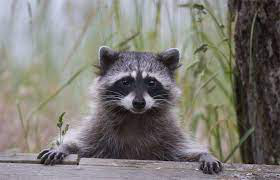

In [15]:
image = Image.open(filename)
image

In [16]:
transform = transforms.Compose([# PIL --> Torch
    transforms.Resize((32,32)),
    transforms.ToTensor(),  # from 0 to 1
    transforms.Lambda(lambda t: (t*2) - 1) # 0 --> -1 1 --> 1
])
reverse_transform = transforms.Compose([ # Torch --> PIL
    transforms.Lambda(lambda t: (t+1)/2 ),
    transforms.Lambda(lambda t: t.permute(1,2,0)),                                   
    transforms.Lambda(lambda t: t * 255.),
    transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
    transforms.ToPILImage(),                                     
])

In [17]:
torch_image = transform(image)

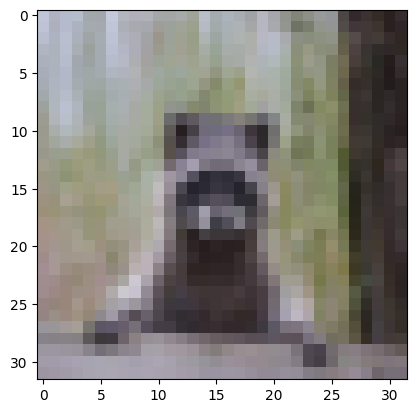

In [18]:
plt.imshow(reverse_transform(torch_image))

In [19]:
t = torch.tensor([0,1,2,3,4])
batch_images = torch.stack([torch_image] * 5)
noisy_images, _ = forward_diffusion(batch_images, t)

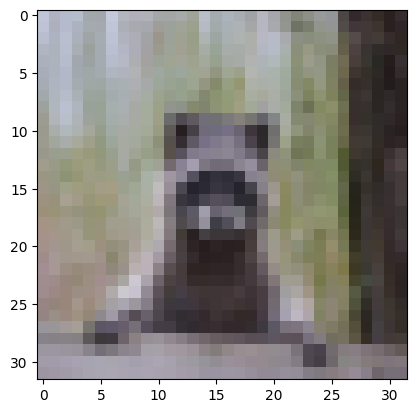

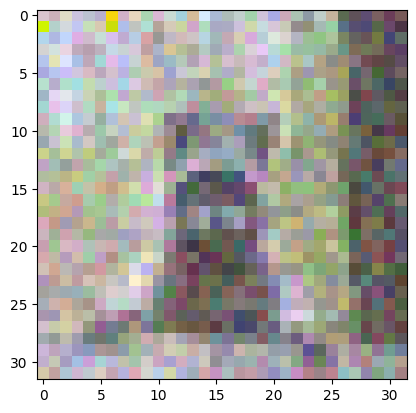

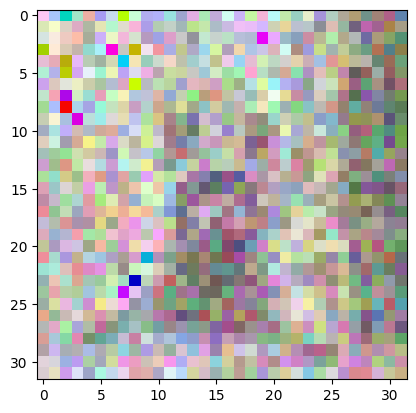

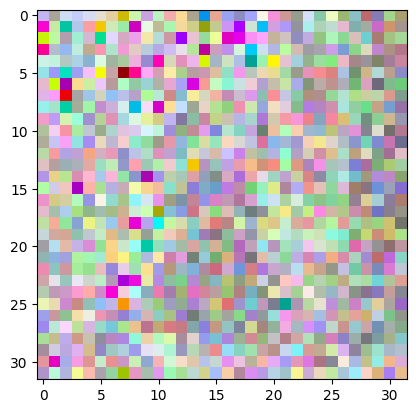

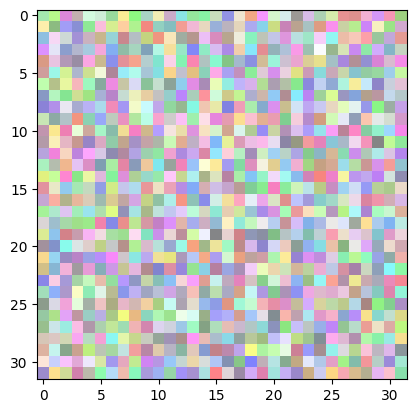

In [20]:
for img in noisy_images:
  plt.imshow(reverse_transform(img))
  plt.show()

# **Again, we clean up the code:**

In [43]:
!pip install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=bfeaebaf476961e60d2e633caf536ab8b22d635655933617a2dc66f75ae94ef2
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=1f3a8bf9f57553277c1d501055cf4

In [48]:
import segmentation_models_pytorch as smp
unet = smp.Unet()
import segmentation_models_pytorch as smp

In [49]:
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision
import math
import matplotlib.pyplot as plt
import torch
import urllib
import numpy as np
import PIL
import segmentation_models_pytorch as smp
unet = smp.Unet()


In [50]:
device = 'cpu'

In [51]:
def get_sample_image()-> PIL.Image.Image:
    url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZmJy3aSZ1Ix573d2MlJXQowLCLQyIUsPdniOJ7rBsgG4XJb04g9ZFA9MhxYvckeKkVmo&usqp=CAU'
    filename = 'racoon.jpg'
    urllib.request.urlretrieve(url, filename)
    return PIL.Image.open(filename)

In [53]:
class DiffusionModel:
    def __init__(self, start_schedule=0.0001, end_schedule=0.02, timesteps = 300):
        self.start_schedule = start_schedule
        self.end_schedule = end_schedule
        self.timesteps = timesteps
        
        """
        if 
            betas = [0.1, 0.2, 0.3, ...]
        then
            alphas = [0.9, 0.8, 0.7, ...]
            alphas_cumprod = [0.9, 0.9 * 0.8, 0.9 * 0.8, * 0.7, ...]
            
        
        """ 
        self.betas = torch.linspace(start_schedule, end_schedule, timesteps)
        self.alphas = 1 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, axis=0)
    def forward(self, x_0, t, device):
        """
        x_0: (B, C, H, W)
        t: (B,)
        """
        noise = torch.randn_like(x_0)
        sqrt_alphas_cumprod_t = self.get_index_from_list(self.alphas_cumprod.sqrt(), t, x_0.shape)
        sqrt_one_minus_alphas_cumprod_t = self.get_index_from_list(torch.sqrt(1. - self.alphas_cumprod), t, x_0.shape)

        mean = sqrt_alphas_cumprod_t.to(device) * x_0.to(device)
        variance = sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device)
        
        return mean + variance, noise.to(device)
    
    @torch.no_grad()
    def backward(self, x, t, model, **kwargs):
        """
        Calls the model to predict the noise in the image and returns 
        the denoised image. 
        Applies noise to this image, if we are not in the last step yet.
        """
        betas_t = self.get_index_from_list(self.betas, t, x.shape)
        sqrt_one_minus_alphas_cumprod_t = self.get_index_from_list(torch.sqrt(1. - self.alphas_cumprod), t, x.shape)
        sqrt_recip_alphas_t = self.get_index_from_list(torch.sqrt(1.0 / self.alphas), t, x.shape)
        mean = sqrt_recip_alphas_t * (x - betas_t * model(x, t, **kwargs) / sqrt_one_minus_alphas_cumprod_t)
        posterior_variance_t = betas_t

        if t == 0:
            return mean
        else:
            noise = torch.randn_like(x)
            variance = torch.sqrt(posterior_variance_t) * noise 
            return mean + variance
    

    @staticmethod
    def get_index_from_list(values, t, x_shape):
        batch_size = t.shape[0]
        """
        pick the values from vals
        according to the indices stored in `t`
        """
        result = values.gather(-1, t.cpu())
        """
        if 
        x_shape = (5, 3, 64, 64)
            -> len(x_shape) = 4
            -> len(x_shape) - 1 = 3
            
        and thus we reshape `out` to dims
        (batch_size, 1, 1, 1)
        
        """
        return result.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)